In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/GOOG_train.csv")

In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2021-06-03,2395.020020,2409.745117,2382.830078,2404.610107,2404.610107,917300
1254,2021-06-04,2422.520020,2453.858887,2417.770020,2451.760010,2451.760010,1297400
1255,2021-06-07,2451.320068,2468.000000,2441.072998,2466.090088,2466.090088,1192500
1256,2021-06-08,2479.899902,2494.495117,2468.239990,2482.850098,2482.850098,1253000
1257,2021-06-09,2499.500000,2505.000000,2487.330078,2491.399902,2491.399902,1006300


In [ ]:
df = df["Close"]
df.describe()

count    1258.000000
mean     1213.457483
std       380.308660
min       668.260010
25%       958.119980
50%      1132.005005
75%      1358.957519
max      2491.399902
Name: Close, dtype: float64

**Stationarity**\
Subtract the previous value from the current value. Now if we just difference once, we might not get a stationary series so we might need to do that multiple
times.
And the minimum number of differencing operations needed to make the series stationary needs to be imputed into our ARIMA model.

**ADF test**\
We'll use the Augumented Dickey Fuller (ADF) test to check if the price series is stationary.
The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we can
reject the null hypothesis and infer that the time series is indeed stationary.
So, in our case, if the p-value > 0.05 we'll need to find the order of differencing.

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.dropna())
print("ADF Statistics:", result[0])
print("p Value", result[1])

ADF Statistics: 1.9368159937737082
p Value 0.9985850027950328


In [ ]:
# Now to make data Stationary we subtract previous value from current till we get p < 0.05 
# To find out how many times we need to repeat the above step we use pmdarima
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima.arima.utils import ndiffs

In [ ]:
d_value = ndiffs(df,test = "adf")
print("d value:", d_value)

d value: 1


**Р-Term**\
p is the order of the Auto Regressive (AR) term. It refers to the number of lags to be used as predictors.
We can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.
The partial autocorrelation represents the correlation between the series and its lags.

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf    #For Partial Auto Co-relation plot

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


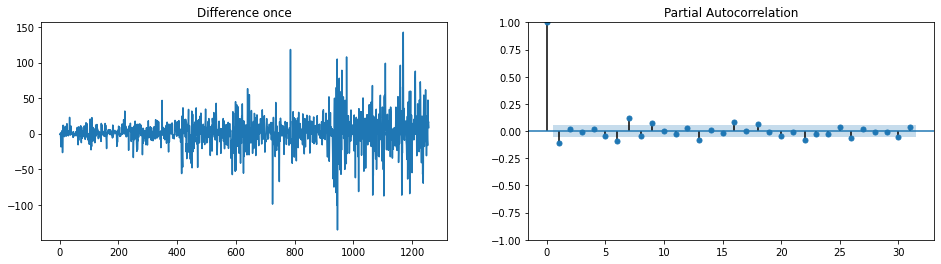

In [ ]:
Diff = df.diff().dropna()   #As we found d_value is 1 so taking first diff
fig, (axl, ax2) = plt.subplots(1, 2, figsize = (16,4))
axl.plot(Diff)
axl.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(Diff, ax=ax2);

In [ ]:
# So we use the lags 7 as they lie above significance line
# we select our q term 2 as it lie below significance line

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(df, order=(7,1,10))

In [ ]:
result = model.fit()
print(result.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1258
Model:                ARIMA(7, 1, 10)   Log Likelihood               -5629.820
Date:                Sat, 16 Jul 2022   AIC                          11295.641
Time:                        20:41:32   BIC                          11388.098
Sample:                             0   HQIC                         11330.389
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8443      1.685     -0.501      0.616      -4.147       2.458
ar.L2          0.2658      1.444      0.184      0.854      -2.564       3.096
ar.L3         -0.2435      0.774     -0.314      0.7

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict

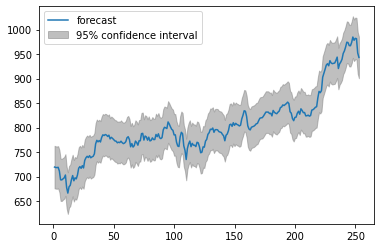

In [ ]:
plot_predict(result, start = 1, end = 253, dynamic = False);

In [ ]:
#Now lets Forecast
steps = 253
fc = result.forecast(steps)

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/GOOG_test.csv")
test 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-10,2494.010010,2523.260010,2494.000000,2521.600098,2521.600098,1561700
1,2021-06-11,2524.919922,2526.989990,2498.290039,2513.929932,2513.929932,1262000
2,2021-06-14,2513.389893,2528.229980,2500.939941,2527.040039,2527.040039,1127500
3,2021-06-15,2530.439941,2537.239990,2512.969971,2520.659912,2520.659912,1109100
4,2021-06-16,2524.949951,2530.469971,2482.999023,2513.929932,2513.929932,1315800
...,...,...,...,...,...,...,...
248,2022-06-03,2319.850098,2327.290039,2273.360107,2291.280029,2291.280029,1252600
249,2022-06-06,2334.850098,2387.969971,2330.565918,2340.209961,2340.209961,1189300
250,2022-06-07,2312.959961,2354.972900,2302.510010,2344.590088,2344.590088,1320700
251,2022-06-08,2337.530029,2372.919922,2333.935059,2344.760010,2344.760010,1127200


In [ ]:
test = test["Close"]

In [ ]:
test

0      2521.600098
1      2513.929932
2      2527.040039
3      2520.659912
4      2513.929932
          ...     
248    2291.280029
249    2340.209961
250    2344.590088
251    2344.760010
252    2298.360107
Name: Close, Length: 253, dtype: float64

In [ ]:
test.index + 1258

RangeIndex(start=1258, stop=1510, step=1)

In [ ]:
fc_series = pd.Series(fc)

In [ ]:
fc_series

1258    2496.025652
1259    2493.970387
1260    2489.556723
1261    2493.657200
1262    2490.971838
           ...     
1506    2495.550781
1507    2495.550781
1508    2495.550781
1509    2495.550781
1510    2495.550781
Name: predicted_mean, Length: 253, dtype: float64

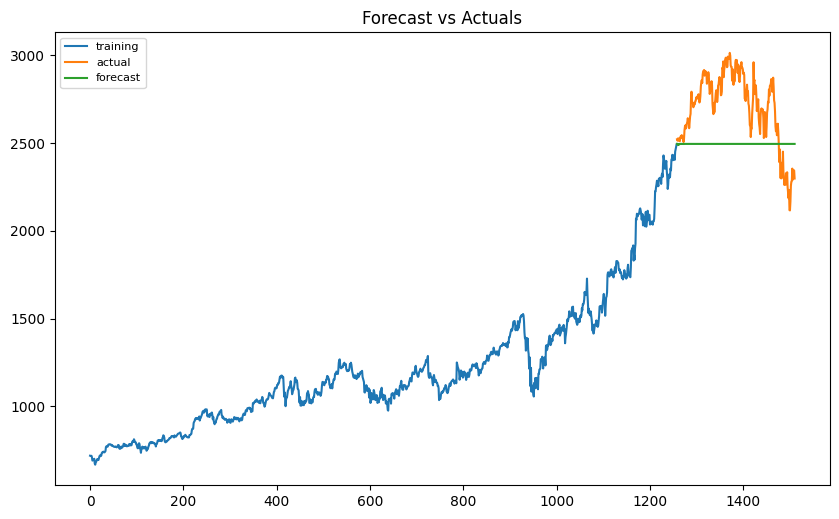

In [ ]:
#Plotting 
plt.figure(figsize=(10,6), dpi=100)
plt.plot(df, label='training')
plt.plot(test.index + 1258,test,label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()